<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/2_Processo_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proceso de Poisson

En el processo de Poisson, el tiempo entre eventos sigue una distribución exponencial, que esta asociada a la propriedad de perdida de memoria, $T\sim Exp(\lambda)$, dada por  
$$
f(t) = \begin{cases}
\lambda e^{-\lambda t}, \quad t \geq 0 \\
0, \quad t < 0.
\end{cases}
$$

donde $\lambda$ es la tasa de ocurrencia.

La propriedad de perdida de memoria:
$$
P(T > t+s | T > s) = P(T > t).
$$

Además, el número de eventos que ocurren en un intervalo de tiempo $t$, dado por $N(t)$, sigue una distribuição de Poisson con tasa $\lambda t$,

$$ P[N(t) = k] = \frac{e^{-\lambda t} (\lambda t)^k}{k!},$$

Además, se verifica

$$\lambda = \frac{E(N(t))}{t}.$$

## Simulación de un proceso de Poisson

Asumímos que los tiempos de ocurrencia entre los eventos siguen una distribución exponencial.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as math


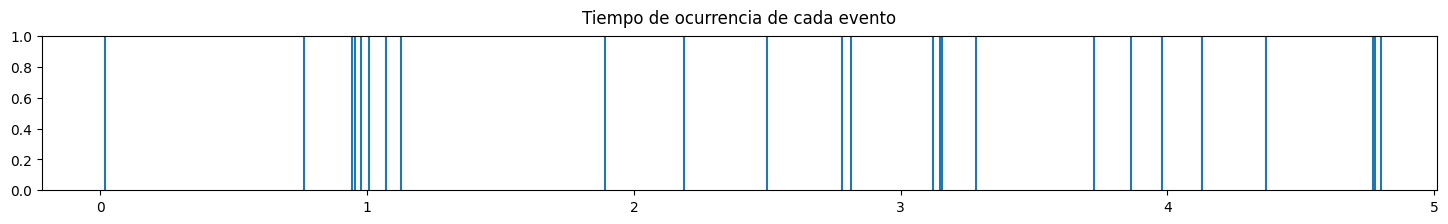

In [ ]:
rate = 5 # tasa
n = 25 # número de eventos
T = np.zeros(n) # vector que almacena los tiempos entre eventos
te = 0
for i in range(n):
    ti = np.random.exponential(1/rate)
    te = te + ti
    T[i]=te
plt.figure(figsize=(18,2))
plt.title("Tiempo de ocurrencia de cada evento", y=1.03)
for t in T:
    plt.axvline(x=t)
plt.show(True)

Podemos obtener la evolución del número de eventos en cada intervalo de tiempo de tamaño $t$. La probabilidad que ocurran  $k$ eventos en un intervalo $t$ es:
$$
P(N(t) = k) = \frac{e^{-\lambda t} (\lambda t)^k}{k!}
$$

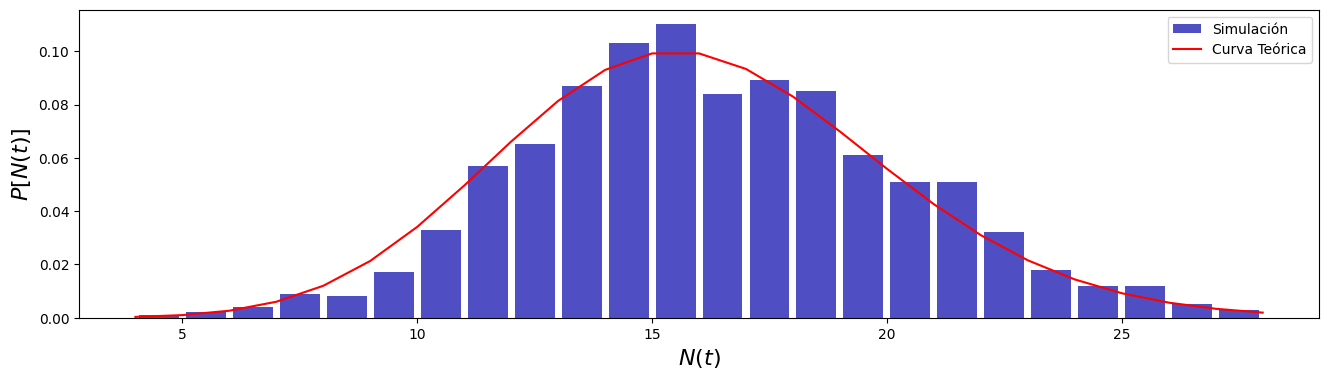

In [ ]:


rate = 4
tmax = 4
nsim = 1000
Ns = []
for s in range(0,nsim):
    te = 0
    ne = 0
    while (te < tmax):
        te = te + np.random.exponential(1/rate)
        if(te < tmax):
            ne = ne + 1
    Ns.append(ne)
plt.figure(figsize=(16,4))
bins = range(np.min(Ns), np.max(Ns))
plt.hist(x=Ns, bins=bins,color='#0504aa', alpha=0.7, rwidth=0.85, density = True, label='Simulación')
plt.xlabel(r'$N(t)$', fontsize=16)
plt.ylabel(r'$P[N(t)]$', fontsize=16)

x = range(np.min(Ns),np.max(Ns))
P = []
for k in x:
    prob = (np.exp(-rate*tmax)*(rate*tmax)**k)/math.factorial(k)
    P.append(prob)
plt.plot(x,P, color = 'red', label='Curva Teórica')
plt.legend()
plt.show(True)

Podemos mostrar la evolución del número de eventos en el transcurso del tiempo. Notemos que la evolución de la curva depende de $\lambda$.

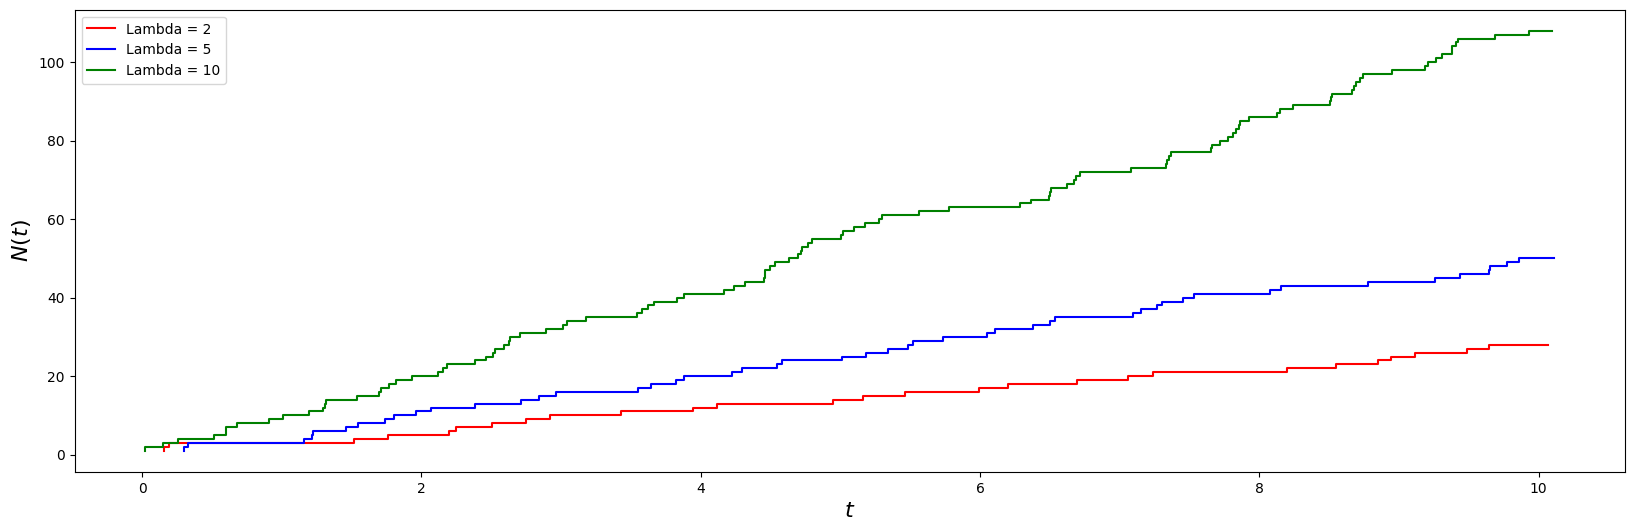

In [ ]:

colors = ['red','blue','green']
rates = [2,5,10]
tmax = 10
plt.figure(figsize=(20,6))
aux = 0
for rate in rates:
    N = []
    T = []
    ne = 0
    te = 0
    while (te < tmax):
        te = te + np.random.exponential(1/rate)
        if(te < tmax):
           ne = ne + 1
        N.append(ne)
        T.append(te)
    plt.step(T, N, color = colors[aux], label = "Lambda = %d"%rate)
    aux = aux + 1
plt.legend()
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$N(t)$', fontsize=16)
plt.show(True)

## Ley de los eventos raros

$$
\lim_{n\rightarrow \infty} \frac{n!}{(n-k)!k!}\left( \frac{\lambda t}{n}\right)^k \left( 1 - \frac{\lambda t}{n}\right)^{n-k} =  \frac{e^{-\lambda t} (\lambda t)^k}{k!} = P(N(t) = k)
$$

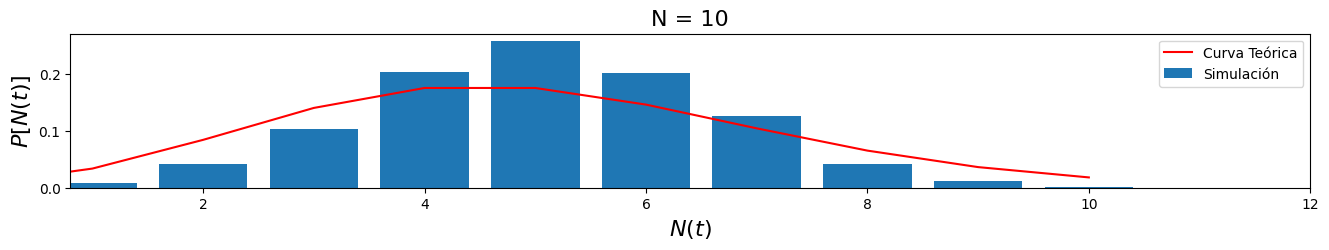

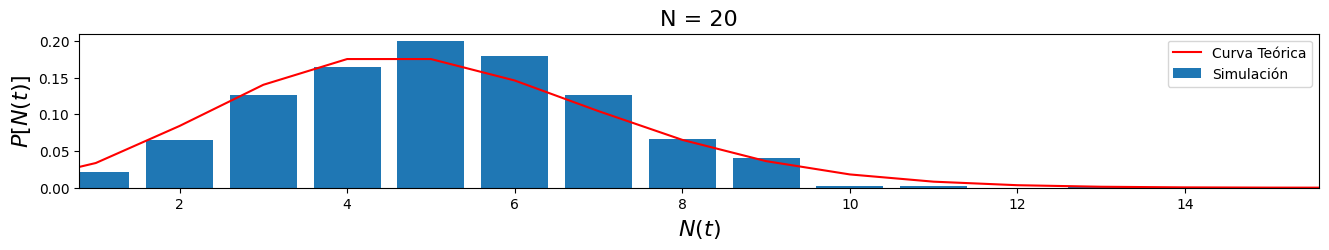

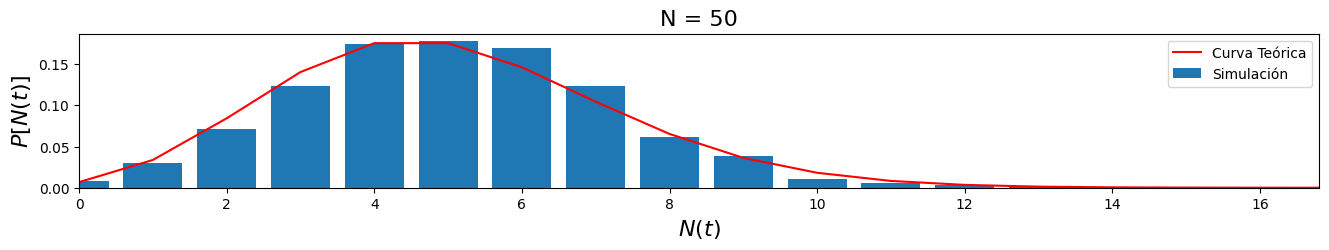

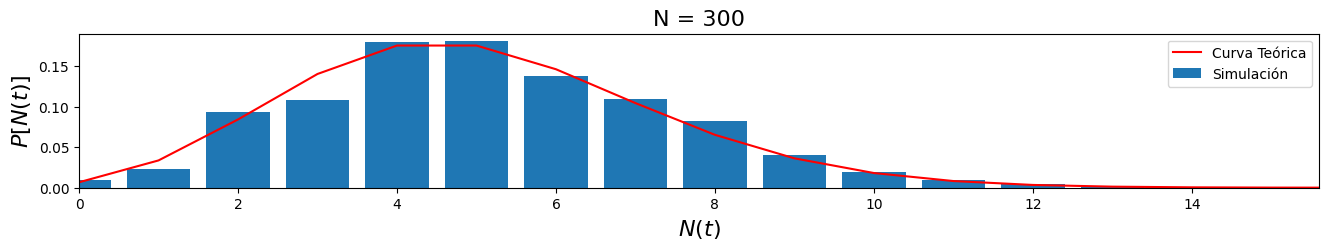

In [ ]:
from random import seed
from scipy.special import factorial

import math

seed(100) # semilla
t = 1
rate = 5
N = [10, 20, 50, 300]
for n in N:
    p = rate*t/n
    Pk = np.zeros(n+1)
    vk = np.arange(0,n+1)
    ns = 1000 # número de simulaciones

    for j in range(0,ns):
        S = 0 # número de éxitos
        for i in range(0,n): # realize para n experimentos
            r = np.random.uniform() #
            if(r <= p):
                S = S + 1
        Pk[S] = Pk[S] + 1
    Pk=Pk/sum(Pk) # Normalización
    plt.figure(figsize=(16,2))
    plt.xlim(0.8*np.min(vk[Pk>0]),1.2*np.max(vk[Pk>0]))
    plt.bar(vk, Pk, label='Simulación')

    # curva teórica
    x = range(0,n+1)
    P = []
    #rate = n*p
    for k in x:
        prob = (np.exp(-rate*t)*(rate*t)**k)/factorial(k)
        P.append(prob)
    plt.plot(x,P, color = 'red', label='Curva Teórica')
    plt.title('N = ' + str(n), fontsize=16)
    plt.legend()
    plt.xlabel(r'$N(t)$', fontsize=16)
    plt.ylabel(r'$P[N(t)]$', fontsize=16)
    plt.show(True)

## Ejemplo

En una tienda, la tasa de llegada de clientes hombres, es igual a $\lambda_1 = 5$ hombres por hora y de clientes mujeres, es igual a $\lambda_2 = 10$ mujeres por hora. Calcular la probabilidad de que la tienda recibirá 30 personas en dos horas.

In [ ]:
t = 2
lbd1 = 5
lbd2 = 10
lbd = lbd1 + lbd2
# Se considera que X=Exponencial(15)
k = 30
# N(t) = Poisson(30)
Prob = (np.exp(-lbd*t)*(lbd*t)**k)/math.factorial(k)
print('P(N(2) = 30) =', Prob)

P(N(2) = 30) = 0.07263452647159149


Notemos que a pesar que esta probabilidad es baja, esta probabilidad es la mayor posible, pues la calculamos en el valor médio de $\lambda t$.

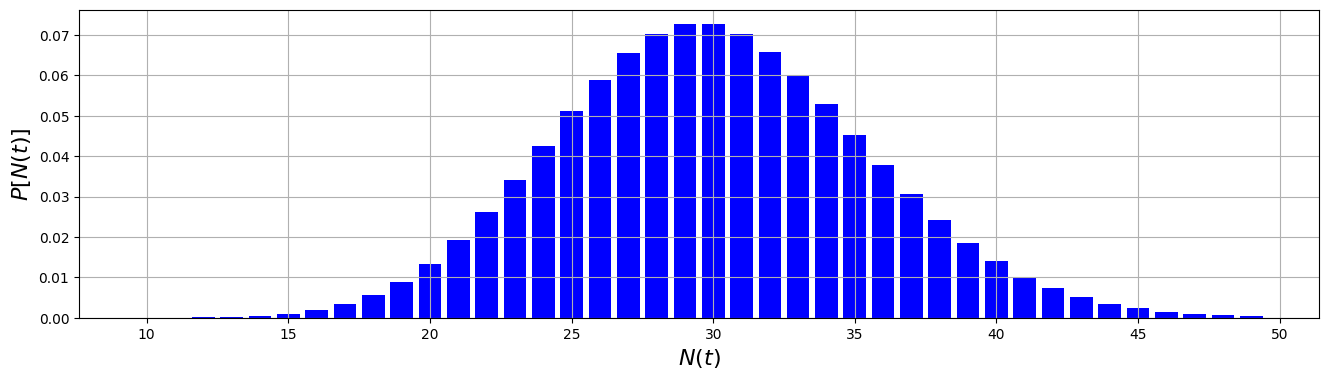

In [ ]:
t = 2
lbd1 = 5
lbd2 = 10
lbd = lbd1 + lbd2

P = []
vk = []
for k in range(10, 50):
    Prob = (np.exp(-lbd*t)*(lbd*t)**k)/math.factorial(k)
    P.append(Prob)
    vk.append(k)
plt.figure(figsize=(16,4))
plt.bar(vk, P, color = 'blue')
plt.xlabel(r'$N(t)$', fontsize=16)
plt.ylabel(r'$P[N(t)]$', fontsize=16)
plt.grid(True)
plt.show(True)